#### Explorando dados dos setores censitários de Resende/RJ

Setor censitário corresponde a menor porção territorial utilizada pelo IBGE.
Um setor corresponde a um recorte do território nacional, considerando a Divisão Político-Administrativa e outras estruturas territoriais, que permite o levantamento das informações estatísticas dentro do prazo determinado para a coleta.

Os dados foram coletados no site do IBGE https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html, dentro da pasta de Censo Demográfico 2010.


O objetivo desse notebook é explorar os arquivos coletados, avaliar quais informações conseguimos retirar e verificar se serão úteis para o nosso projeto.

Ao total temos 26 arquivos .CSVs/.xls com dados diversos.

A princípio, escolhi seguir apenas com o os seguintes arquivos:
- Básico_RJ: possui os dados de indentificação dos setores (código, munícipio, bairros)
- Domicilio01: Apresenta dados como tipo de habitação (casa, apartamento) e quantidade de possoas por habitação

Para uma exploração mais profunda também podemos considerar os arquivos nomeados como "entorno" os quais apresentam dados de infraestrutura de cada setor como pavimento, calçada, saneamento.

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [71]:
#importando o arquivo basico_RJ
basico = pd.read_excel('Basico_RJ.xls')

In [72]:
basico.head(5)

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,330010005000001,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,2.62,1.94,2356.80,5716056.06,2571.06,5684616.94,1565.37,4344465.56,2192.65,4711305.89
1,330010005000002,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,2.51,1.50,2040.47,3020377.79,2236.67,2869054.77,1816.69,20052928.88,2375.67,24942113.99
2,330010005000003,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.08,2.19,2687.80,8362007.52,2836.66,8402987.99,1593.37,7250920.66,2294.84,8835722.10
3,330010005000004,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.04,3.25,3026.67,24807309.86,3352.62,26410753.99,1865.52,10994097.59,2574.41,13362652.63
4,330010005000005,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33013,Baía da Ilha Grande,0,...,3.34,1.94,1124.82,712447.24,1229.19,649944.69,689.40,583588.50,1028.21,521878.03


In [73]:
#verificando as colunas
basico.dtypes

Cod_setor                int64
Cod_Grandes Regiões      int64
Nome_Grande_Regiao      object
Cod_UF                  object
Nome_da_UF              object
Cod_meso                 int64
Nome_da_meso            object
Cod_micro                int64
Nome_da_micro           object
Cod_RM                   int64
Nome_da_RM              object
Cod_municipio            int64
Nome_do_municipio       object
Cod_distrito             int64
Nome_do_distrito        object
Cod_subdistrito          int64
Nome_do_subdistrito     object
Cod_bairro               int64
Nome_do_bairro          object
Situacao_setor           int64
Tipo_setor               int64
V001                   float64
V002                   float64
V003                   float64
V004                   float64
V005                   float64
V006                   float64
V007                   float64
V008                   float64
V009                   float64
V010                   float64
V011                   float64
V012    

In [74]:
#Selecionando os setores de Resende e VR utilizando os códigos do muncípios no IBGE (3304201 e 3306305)
cod_resende = basico[basico['Cod_municipio'] == 3304201]
cod_vr = basico[basico['Cod_municipio'] == 3306305]
cod_setor_r = cod_resende['Cod_setor']

#### 1. Quantidade de setores censitários e bairros por cidades


---

In [75]:
cod_resende['Nome_do_bairro'].describe()

count                          217
unique                          65
top       RESENDE (demais setores)
freq                            63
Name: Nome_do_bairro, dtype: object

In [76]:
cod_vr['Nome_do_bairro'].describe()

count        456
unique        53
top       Retiro
freq          60
Name: Nome_do_bairro, dtype: object

**Resende:** 217 setores censitários e 65 bairros

**Volta Redonda:** 456 setores censitários e 53 bairros

&nbsp;
#### 2. Situação dos setores


---

In [77]:
situação_setores_resende = cod_resende.groupby('Situacao_setor')['Cod_setor'].size()
print(situação_setores_resende)

Situacao_setor
1    184
2      2
3      5
4      6
8     20
Name: Cod_setor, dtype: int64


In [78]:
situação_setores_vr = cod_vr.groupby('Situacao_setor')['Cod_setor'].size()
situação_setores_vr

Situacao_setor
1    442
2     13
8      1
Name: Cod_setor, dtype: int64

- 1 - Área urbanizada de cidade ou vila
- 2 - Área não-urbanizada de cidade ou vila
- 3 - Área urbana isolada
- 4 - Aglomerado rural de extensão urbana
- 5 - Aglomerado rural isolado - povoado
- 6 - Aglomerado rural isolado - núcleo
- 7 - Aglomerado rural isolado - outros aglomerados
- 8 - Zona rural, exclusive aglomerado rural

Praticamento todos os setores das duas cidades estão localizados em zona urbana.


In [79]:
setores_nao_urb_vr = cod_vr.query('Situacao_setor in [2,8]')
setores_nao_urb_vr.groupby('Nome_do_bairro').size().head()

Nome_do_bairro
VOLTA REDONDA (demais setores)    14
dtype: int64

In [80]:
setores_nao_urb_resende = cod_resende.query('Situacao_setor in [2,3,8,4]')
setores_nao_urb_resende.groupby('Nome_do_bairro').size().head()

Nome_do_bairro
RESENDE (demais setores)    33
dtype: int64

Praticamente todos bairros classificados como 'Demais Setores' não são zonas urbanizadas (14 dos 18 para VR e 33 de 63 para Resende - Vide próximas linhas).

Poderíamos desconsiderar os setores classificados dessa forma então?
&nbsp;

#### 3. Quantidade de setores por bairro


---

In [81]:
#Quantidade de Setores por bairros
bairros_setor_vr = cod_vr.groupby('Nome_do_bairro')['Cod_setor'].size().sort_values(ascending = False)
bairros_setor_resende = cod_resende.groupby('Nome_do_bairro')['Cod_setor'].size().sort_values(ascending = False)

In [82]:
bairros_setor_vr.head(10)

Nome_do_bairro
Retiro                            60
Santo Agostinho                   40
Vila Brasília                     30
VOLTA REDONDA (demais setores)    18
Casa de Pedra                     16
Água Limpa                        15
Siderlândia                       14
Belmonte                          13
Aterrado                          13
Vila Mury                         13
Name: Cod_setor, dtype: int64

In [182]:
#bairros_setor_vr.iloc[0:10].plot.bar()
bairros_setor_resende.iloc[0:10]

Nome_do_bairro
RESENDE (demais setores)    63
Cidade da Alegria           14
Paraíso                     11
Vila Julieta                11
Vila Liberdade               7
Cabral                       7
Vila Itapuca                 5
Centro                       5
Vila Nova Liberdade          4
Campos Elíseos               4
Name: Cod_setor, dtype: int64

In [84]:
bairros_setor_resende.head(10)

Nome_do_bairro
RESENDE (demais setores)    63
Cidade da Alegria           14
Paraíso                     11
Vila Julieta                11
Vila Liberdade               7
Cabral                       7
Vila Itapuca                 5
Centro                       5
Vila Nova Liberdade          4
Campos Elíseos               4
Name: Cod_setor, dtype: int64

&nbsp;

#### 4. Rendimento médio por bairro


---

In [85]:
# Média de rendimento por bairro
# V005: Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes
rend_med_vr = cod_vr.groupby('Nome_do_bairro')['V005'].mean().sort_values(ascending = False)
rend_med_vr.head(10)
#rend_med_vr.iloc[0:10].plot.bar()

Nome_do_bairro
Laranjal              4488.663333
Jardim Suiça          4011.880000
Bela Vista            3655.320000
Barreira Cravo        3556.775000
Vila Santa Cecília    3544.661429
Jardim Amália         3168.000000
Jardim Belvedere      3016.174000
São João Batista      2903.960000
Niterói               2774.890000
Jardim Europa         2563.270000
Name: V005, dtype: float64

In [86]:
rend_med_resende = cod_resende.groupby('Nome_do_bairro')['V005'].mean().sort_values(ascending = False)
rend_med_resende.head(10)

Nome_do_bairro
Condomínio Horizontal Tácito     12882.61
Indústria IQR                     6499.90
Condomínio Morada das Agulhas     6189.33
Morada do Castelo                 5455.71
Casa da Lua                       5396.95
Vila Adelaide                     4563.94
Jardim Brasília II                4304.13
Vila Elizabeth                    3962.13
Morada do Bosque                  3567.50
Barbosa Lima                      3567.09
Name: V005, dtype: float64

Condomínio Horizontal Tácito e Industria IQR - Consideradas bairro pelo IBGE?!
&nbsp;

#### 5. Número de moradores por bairro


---

In [87]:
#V002: Número de moradores em domicílios particulares permanentes no setor
pessoas_bairro_resende = cod_resende.groupby('Nome_do_bairro')['V002'].sum().sort_values(ascending = False)
pessoas_bairro_resende.head(10)

Nome_do_bairro
RESENDE (demais setores)    25283.0
Cidade da Alegria           11973.0
Paraíso                      7447.0
Vila Julieta                 6100.0
Cabral                       4743.0
Vila Liberdade               3907.0
Vila Itapuca                 3710.0
Vila Santo Amaro             2851.0
Centro                       2814.0
Vila Nova Liberdade          2432.0
Name: V002, dtype: float64

In [88]:
pessoas_bairro_vr = cod_vr.groupby('Nome_do_bairro')['V002'].sum().sort_values(ascending = False)
pessoas_bairro_vr.head(10)

Nome_do_bairro
Retiro             28521.0
Santo Agostinho    26179.0
Vila Brasília      14937.0
Casa de Pedra      11999.0
Água Limpa         10532.0
Açude               9132.0
Siderlândia         9108.0
Jardim Amália       8710.0
Vila Mury           8702.0
Santa Cruz          8390.0
Name: V002, dtype: float64

&nbsp;

#### 6. Utilizando a tabela de domicílios01


---

In [100]:
#importando apenas algumas colunas da tabela de domicílios 
dom = pd.read_excel('Domicilio01_RJ.xls', usecols='A,AZ:BI,CX:CZ,FX:FZ')

In [90]:
dom.head()

,Cod_setor,V050,V051,V052,V053,V054,V055,V056,V057,V058,V059,V100,V101,V102,V178,V179,V180
0,330010005000001,36,49,32,24,10,2,3,0,0,0,86,1,22,22,0,20
1,330010005000002,12,21,12,8,3,1,0,0,0,0,13,0,23,10,0,8
2,330010005000003,44,95,78,76,29,15,2,2,2,0,203,0,58,22,0,12
3,330010005000004,10,24,13,17,3,1,3,0,0,1,24,0,10,21,0,15
4,330010005000005,16,47,59,48,25,15,1,1,0,0,160,1,48,0,0,1


In [119]:
#fazendo o inner join do df dom com o df de resende
resende = pd.merge(cod_resende, dom, on='Cod_setor', how='inner')
resende

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V056,V057,V058,V059,V100,V101,V102,V178,V179,V180
0,330420105000001,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,2,0,1,0,99,0,57,21,0,30
1,330420105000002,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,0,0,0,139,5,58,2,0,6
2,330420105000003,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,0,0,1,76,2,19,10,3,13
3,330420105000004,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,3,0,0,1,111,8,36,28,1,41
4,330420105000005,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,0,0,0,40,2,19,82,17,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,330420130000006,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,2,1,0,0,61,2,10,0,0,0
213,330420130000008,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,2,0,0,1,78,0,2,0,0,0
214,330420130000009,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,0,0,0,23,0,4,0,0,0
215,330420130000010,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,2,0,0,12,0,7,0,0,0


In [120]:
#fazendo o inner join do df dom com o df de volta redonda
volta_redonda = pd.merge(cod_vr, dom, on='Cod_setor', how='inner')
volta_redonda

,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V056,V057,V058,V059,V100,V101,V102,V178,V179,V180
0,330630505000001,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,0,0,0,25,0,26,58,6,86
1,330630505000002,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,1,1,0,11,0,1,43,0,83
2,330630505000003,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,1,1,0,0,13,0,5,67,7,50
3,330630505000004,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,0,1,0,0,51,3,15,74,5,27
4,330630505000005,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,0,1,0,0,51,4,20,52,8,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,330630505000488,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,5,3,0,0,170,1,4,1,0,0
452,330630505000489,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,2,2,0,0,37,4,1,0,0,0
453,330630505000490,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,14,10,1,1,340,1,28,2,0,0
454,330630505000491,3,Região Sudeste,RJ,Rio de Janeiro,3305,Sul Fluminense,33011,Vale do Paraíba Fluminense,0,...,7,7,2,0,92,6,12,0,0,0


In [123]:
#retirando algumas colunas 
volta_redonda.drop(['Cod_Grandes Regiões',
              'Nome_Grande_Regiao',
              'Cod_UF',
              'Cod_meso',
              'Nome_da_meso',
              'Cod_micro',
              'Nome_da_micro',
              'Cod_RM',
              'Nome_da_RM',
              'Cod_municipio'],
  axis='columns', inplace=True)

In [125]:
#retirando algumas colunas
resende.drop(['Cod_Grandes Regiões',
              'Nome_Grande_Regiao',
              'Cod_UF',
              'Cod_meso',
              'Nome_da_meso',
              'Cod_micro',
              'Nome_da_micro',
              'Cod_RM',
              'Nome_da_RM',
              'Cod_municipio'],
  axis='columns', inplace=True)

In [131]:
resende.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 0 to 216
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            217 non-null    int64  
 1   Nome_da_UF           217 non-null    object 
 2   Nome_do_municipio    217 non-null    object 
 3   Cod_distrito         217 non-null    int64  
 4   Nome_do_distrito     217 non-null    object 
 5   Cod_subdistrito      217 non-null    int64  
 6   Nome_do_subdistrito  217 non-null    object 
 7   Cod_bairro           217 non-null    int64  
 8   Nome_do_bairro       217 non-null    object 
 9   Situacao_setor       217 non-null    int64  
 10  Tipo_setor           217 non-null    int64  
 11  V001                 217 non-null    float64
 12  V002                 217 non-null    float64
 13  V003                 217 non-null    float64
 14  V004                 217 non-null    float64
 15  V005                 217 non-null    flo

&nbsp;

Acho que seria legal converter os tipos das colunas?

&nbsp;

In [161]:
X = resende['V050']=='X'
X.sum()

5

In [162]:
X2 = volta_redonda['V050']=='X'
X2.sum()

8

In [169]:
#Removendo os valores "x" dos dados
resende2 = resende.replace(['X'], 0)
volta_redonda2 = volta_redonda.replace(['X'], 0)

In [179]:
#Quantidade de domicilios particulares permanentes com 1 a 5 moradores por bairro - Resende
dom_1p_resende = resende2.groupby('Nome_do_bairro')['V050'].sum().sort_values(ascending = False)
dom_2p_resende = resende2.groupby('Nome_do_bairro')['V051'].sum().sort_values(ascending = False)
dom_3p_resende = resende2.groupby('Nome_do_bairro')['V052'].sum().sort_values(ascending = False)
dom_4p_resende = resende2.groupby('Nome_do_bairro')['V053'].sum().sort_values(ascending = False)
dom_5p_resende = resende2.groupby('Nome_do_bairro')['V054'].sum().sort_values(ascending = False)

In [183]:
#Quantidade de domicilios particulares permanentes com 1 a 5 moradores por bairro - Volta Redonda
dom_1p_vr = volta_redonda2.groupby('Nome_do_bairro')['V050'].sum().sort_values(ascending = False)
dom_2p_vr = volta_redonda2.groupby('Nome_do_bairro')['V051'].sum().sort_values(ascending = False)
dom_3p_vr = volta_redonda2.groupby('Nome_do_bairro')['V052'].sum().sort_values(ascending = False)
dom_4p_vr = volta_redonda2.groupby('Nome_do_bairro')['V053'].sum().sort_values(ascending = False)
dom_5p_vr = volta_redonda2.groupby('Nome_do_bairro')['V054'].sum().sort_values(ascending = False)

In [186]:
#Casas próprias quitadas - Resende
casa_quitada_resende = resende2.groupby('Nome_do_bairro')['V100'].sum().sort_values(ascending = False)
#Casas próprias em aquisição - Resende
casa_finan_resende = resende2.groupby('Nome_do_bairro')['V101'].sum().sort_values(ascending = False)
#Casas alugadas - Resende
casa_aluguel_resende = resende2.groupby('Nome_do_bairro')['V102'].sum().sort_values(ascending = False)

In [194]:
#Casas próprias quitadas - Volta Redonda
casa_quitada_vr = volta_redonda2.groupby('Nome_do_bairro')['V100'].sum().sort_values(ascending = False)
#Casas próprias em aquisição - Volta Redonda
casa_finan_vr = volta_redonda2.groupby('Nome_do_bairro')['V101'].sum().sort_values(ascending = False)
#Casas alugadas - Volta Redonda
casa_aluguel_vr = volta_redonda2.groupby('Nome_do_bairro')['V102'].sum().sort_values(ascending = False)

Agora que eu tenho as seguintes informações por bairro:
- Renda média mensal 
- Número de moradores
- Número de pessoas por habitação
- Número de apartamentos e casas próprios, alugados e em aquisição

Vou fazer uns gráficos

<AxesSubplot:xlabel='Nome_do_bairro'>

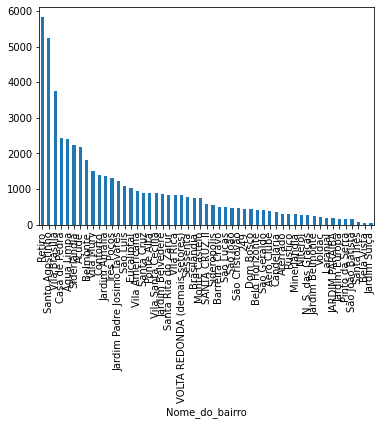

In [195]:
fig = casa_quitada_vr
fig.plot.bar()
https://python.plainenglish.io/making-plots-with-the-pandas-groupby-ac492941af28